<div>
    <img src="emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Credit risk assessment </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2023, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
    </span>
</div>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="color:gray; background-color:#eeeeee">
    Credit risk assessment
</div>


You are given a file named __risk.csv__.

In this file, you have information about several individuals, their loan status, and their credit scores.

Here are the columns descriptions:

- __person_age__ 	Person age
- __person_income__ 	Person annual income
- __person_home_ownership__ 	Person home ownership
- __person_emp_length__ 	Employment length (in years)
- __loan_intent__ 	Loan intention
- __loan_amnt__ 	Loan total amount
- __loan_int_rate__ 	Loan interest rate
- __loan_status__ 	Loan status (0 is non default 1 is default)
- __loan_percent_income__ 	Percent income
- __cb_person_default_on_file__ 	Historical default
- __cb_preson_cred_hist_length__ 	Credit history length

---

<div style="color:gray; background-color:#eeeeee">
PART ONE
</div>


__Q1__ Read the file into a Pandas `DataFrame` and print the first 3 rows of data. Name your dataframe as __df__.

In [6]:
df = pd.read_csv('/Users/zhusijie/Desktop/Fundamentals of python/DMDS Final Exam Dec 2023/risks.csv')
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


__Q2__ Check the dimensions. How many rows and columns do you have in the data set? 

In [8]:
df.shape

(32581, 11)

__Q3__ Check for missing values and delete the rows with missing values if you have any.

In [119]:
df.isna().sum()
# person_emp_length has 895 missing values and loan_int_rate has 3116 missing values
df = df.dropna()
# remove missing values 

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_amnt                0
loan_status              0
dtype: int64

__Q4__ What are the minimum and maximum values of __person_income__ column?

In [15]:
df['person_income'].max()
df['person_income'].min()

4000

__Q5__ What are the unique values in the __loan_intent__ column?

In [16]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

__Q6__ How many samples do we have in the dataset for each __loan_intent__ category?

In [19]:
df.groupby('loan_intent').size()

loan_intent
DEBTCONSOLIDATION    4565
EDUCATION            5704
HOMEIMPROVEMENT      3198
MEDICAL              5293
PERSONAL             4877
VENTURE              5001
dtype: int64

__Q7__ Select all rows where the __loan_intent__ is "EDUCATION" or "MEDICAL". Name this dataframe as __df_new__. 

In [21]:
df_new = df.query('loan_intent in ["EDUCATION", "MEDICAL"]')
df_new.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15093,25,121000,MORTGAGE,9.0,MEDICAL,13600,11.99,0,0.11,N,2
1507,24,26000,RENT,2.0,MEDICAL,1325,12.87,1,0.05,N,4
2879,22,35000,MORTGAGE,5.0,MEDICAL,5000,7.90,0,0.14,N,3
23643,31,45000,RENT,2.0,EDUCATION,9000,12.84,0,0.20,N,5
23445,27,62570,MORTGAGE,11.0,EDUCATION,25000,14.84,0,0.40,N,5


__Q8__ Create a frequency table with the __loan_intent__ (EDUCATION, MEDICAL) in the rows and __loan_stats__ in the columns. Use the __df_new__ dataframe.

<span style="color:crimson">Hint:</span> You can use the `pd.crosstab()` function for this.

In [109]:
pd.crosstab(df_new['loan_intent'],df_new['loan_status'])

loan_status,0,1
loan_intent,,
EDUCATION,4733,971
MEDICAL,3872,1421


__Q9__ What are the loan default percentages for the two __loan_intent__ categories in __df_new__?

In [39]:
df_new['loan_intent'].value_counts(normalize = True)

loan_intent
EDUCATION    0.518687
MEDICAL      0.481313
Name: proportion, dtype: float64

__Q10__  Keep the following columns: 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_status' and drop the rest from the __df__.

In [110]:
df = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_status']]
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status
3666,22,38000,MORTGAGE,5.0,EDUCATION,4200,0
12612,24,25000,RENT,3.0,EDUCATION,3000,0
1966,22,14400,RENT,0.0,HOMEIMPROVEMENT,2100,1
14092,23,100000,MORTGAGE,2.0,VENTURE,14000,0
1581,25,35000,RENT,1.0,MEDICAL,1500,0
29759,36,37400,MORTGAGE,2.0,PERSONAL,6250,0
20165,34,38769,MORTGAGE,3.0,DEBTCONSOLIDATION,2400,0
25248,32,82000,MORTGAGE,4.0,EDUCATION,8000,0
4998,22,37900,RENT,2.0,MEDICAL,5000,1
15062,26,120000,MORTGAGE,10.0,HOMEIMPROVEMENT,20000,0


__Q11__ What is the average __age__ of the people in the dataset?

In [53]:
df['person_age'].mean().round(1)

27.7

__Q12__ What are the average incomes for each home ownership category? 

In [54]:
df.groupby('person_home_ownership')['person_income'].mean().round(2)

person_home_ownership
MORTGAGE    81602.94
OTHER       79079.86
OWN         59549.62
RENT        55511.11
Name: person_income, dtype: float64

__Q13__ What is the number of loan defaults for each homeownership category and for each loan intent type? 



In [56]:
pd.pivot_table(df, index = 'person_home_ownership', columns = 'loan_intent',values = 'loan_status', aggfunc = 'sum')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_home_ownership,,,,,,
MORTGAGE,392,193,211,413,185,91
OTHER,5,5,2,6,8,1
OWN,23,20,28,30,20,25
RENT,876,753,580,972,750,614


__Analyzing the output__ Is there a pattern between homeownership status, intent to borrow, and loan defaults?

In [102]:
# Explain in words

# yes thre is a patten, rent and mortgage tend to loan more than people who own a house. 
# And their first intention is the same, it's for medical reason, then for education reason. 

__Q14__ Display the distribution of __ages__ using a box plot.

<Axes: >

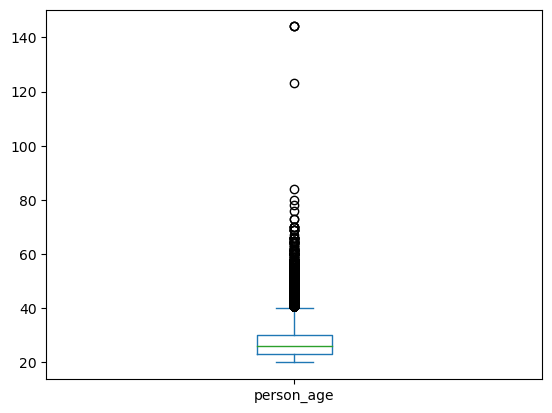

In [60]:
df['person_age'].plot(kind = 'box')

__Q15__ Compare the box plots of __age__ distributions across __person_home_ownership__ status.



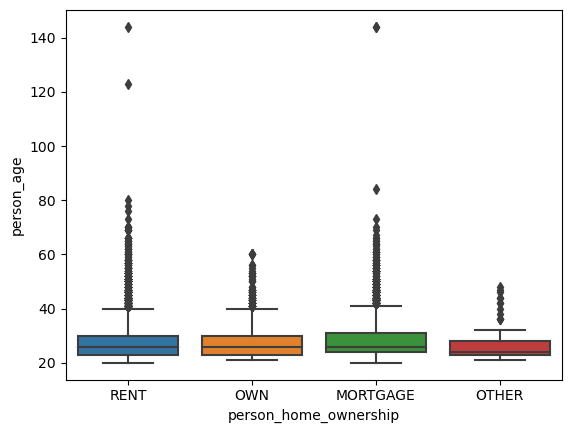

In [107]:
sns.boxplot(df, x='person_home_ownership', y= 'person_age');

---

<div style="color:gray; background-color:#eeeeee">
PART TWO
</div>

__Q16__ Get all the values of the __person_income__ column into a Python list. Name this list as __incomes__.

In [62]:
incomes = df['person_income'].to_list()

__Q17__ Scale all of the values in this list so that they are between 0 and 1.

In [69]:
normalized = [(x-min(incomes))/(max(incomes)-min(incomes)) for x in incomes]

__Q18__ Get all the values of the __person_emp_length__ column into a Python list. Name this list as __emps__.

In [90]:
emps = df['person_emp_length'].to_list()

__Q19__ Create a scatter plot of the values in the __emps__ list against the values in the __incomes__ list.

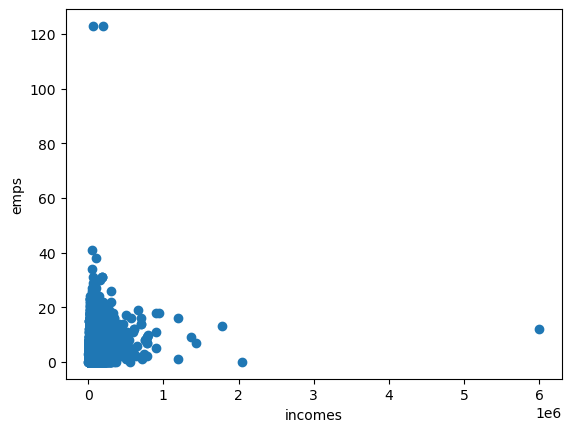

In [118]:
plt.scatter(x = incomes, y =emps)
plt.xlabel('incomes')
plt.ylabel('emps')
plt.show()

__Analyzing the output__ Is there a relationship between how many years people work and how much they earn?

In [77]:
# Explain in words

# According to the output, there is no strong relationship between working years and incomes.

__Q20__ There are three outliers in the figure above. One individual with a very high income and two individuals with years of experience (around 120 years!).

Remove these three individuals from both lists and redo the previous plot.

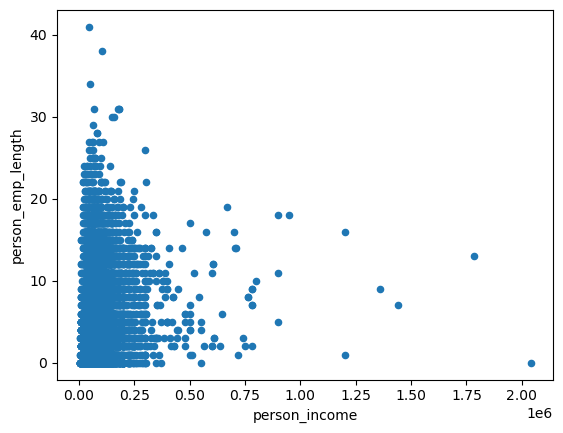

In [116]:
max_income = df['person_income'].max() # One individual with a very high income
max_emps = df['person_emp_length'].max() #two individuals with years of experience
removed = df.query('person_income != @max_income & person_emp_length != @max_emps')
removed.plot(kind = 'scatter', x = 'person_income', y ='person_emp_length');

---